In [13]:
from glucose_dataset import GlucoseDataset
from rockpool.timeseries import TSContinuous, TSEvent
import torch
import matplotlib.pyplot as plt
import numpy as np
import resampy

In [14]:
ds = GlucoseDataset("datasets/diabetes_datasets.zip", sub_directory="Shanghai_T1DM")
sample_data = ds.__getitem__(0)

In [15]:
num_steps_per_sample = 100
dt = ds.sample_interval / num_steps_per_sample

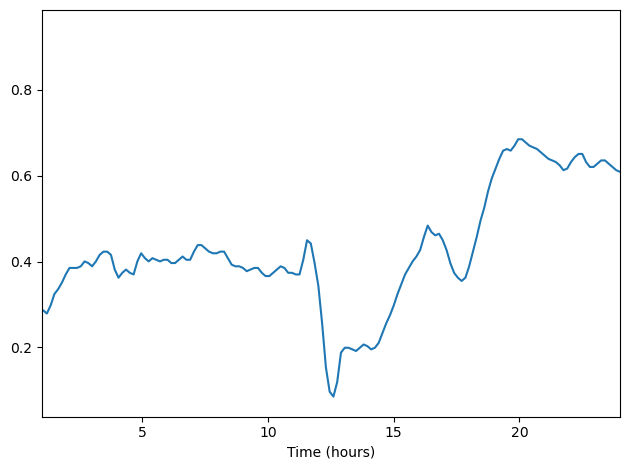

In [16]:
# Plot the time series
ts_continuous = TSContinuous.from_clocked(samples=sample_data, dt=ds.sample_interval) # type: ignore
ts_continuous.plot()
plt.xlabel("Time (hours)")
plt.xlim(1, 24)
plt.tight_layout();

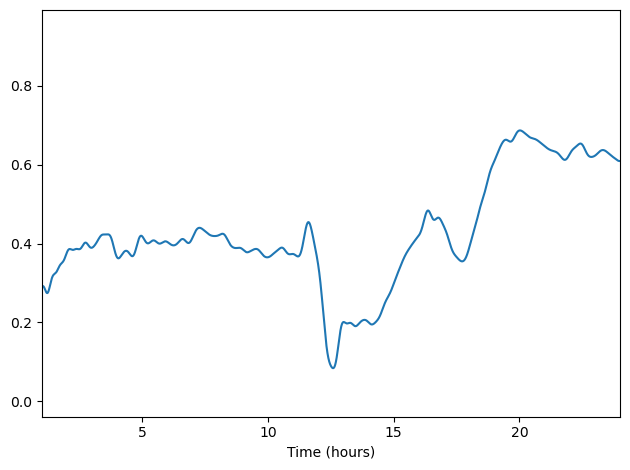

In [18]:
new_times = np.linspace(ts_continuous.times[0], ts_continuous.times[-1], len(ts_continuous.times) * num_steps_per_sample)
supersampled = resampy.resample(ts_continuous.samples, 1, num_steps_per_sample, axis=0, filter='kaiser_best')
smoothed = TSContinuous.from_clocked(samples=supersampled, dt=dt)
smoothed.plot()
plt.xlabel("Time (hours)")
plt.xlim(1, 24)
plt.tight_layout()